In [1]:
#%autosave 0 #if I uncomment it, it means autosave disavbled. Otherwise Jupyternotebook saves every 2 mins or so.

start of video: [ML Zoomcamp 4.1 - Evaluation Metrics: Session Overview](https://www.youtube.com/watch?v=gmg5jw1bM8A&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=40)

# 4. Evaluation Metrics for Classification

In the previous session we trained a model for predicting churn. We build a model with logistic regression for scoring existing customers and assigned them a probability of this customer leaving a company. We trained a model and our accuracy was 80%. In this module we'll try to find out, what does it actually mean. Is it a good score or not. Or, are there other ways of evaluating binary classification models. How do we know if it's good? We'll continue with the same dataset as previous module. 

## 4.1 Evaluation metrics: session overview

* Dataset: [https://www.kaggle.com/blastchar/telco-customer-churn](https://www.kaggle.com/blastchar/telco-customer-churn)

* [https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv)

*Metric* - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [5]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [6]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [7]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

0.8034066713981547

This week we'll look at this number (accuracy) and compare it with a baseline model and see how good this number is, 80% is good or not. Then we'll look at different types of errors e.g. we think that a customer is churning but they are not or other ways, different types of correct decisions, Then we'll see how to put these numbers in a table (called as confusion table). Then we'll look at Precision and Recall, which are good evaluation metrics for binaray classification problem. Then we'll talk about ROC (Receiver Opearing Characteristics) curves. This gives us a way to evaluate a model. With ROC curves we'll be able to evaluate the quality of soft predictions. Then we'll look at the area under the ROC curve, which is the most important metric for binary classification problems. Then we'll finish this week by talking about cross-validation, which is a way of validating our model. It is a more involved process. It has both advantages and disadvanteges. We'll look at it.

end of video: [ML Zoomcamp 4.1 - Evaluation Metrics: Session Overview](https://www.youtube.com/watch?v=gmg5jw1bM8A&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=40)

start of video: [ML Zoomcamp 4.2 - Accuracy and Dummy Model](https://www.youtube.com/watch?v=FW_l7lB0HUI&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=41&t=3s)

## 4.2 Accuracy and dummy model

Here we'll look at accuracy and discuss if 80% accuracy is good enough or not. **Accuracy** is fraction of customers that we predicted rightly.

* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines

In [11]:
len(y_val)

1409

Let's see how many coreect decisions we made:

In [12]:
(y_val == churn_decision).sum()

1132

In [13]:
1132/1409

0.8034066713981547

We used the threshold of 0.5. But did we use it? Is it good or not? Let's find out.

*At this point I have the feeling that, we'll look at accuracy as a a function of threshold.*

In [16]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

Each of thresholds, we can use as an individual threshold.

In [25]:
scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f  %.3f' %(t, score))
    scores.append(score)

0.00  0.274
0.05  0.509
0.10  0.591
0.15  0.666
0.20  0.710
0.25  0.739
0.30  0.760
0.35  0.772
0.40  0.785
0.45  0.793
0.50  0.803
0.55  0.801
0.60  0.795
0.65  0.786
0.70  0.766
0.75  0.744
0.80  0.735
0.85  0.726
0.90  0.726
0.95  0.726
1.00  0.726


We see above that 0.5 is the best threshold.

Text(0, 0.5, 'accuracy')

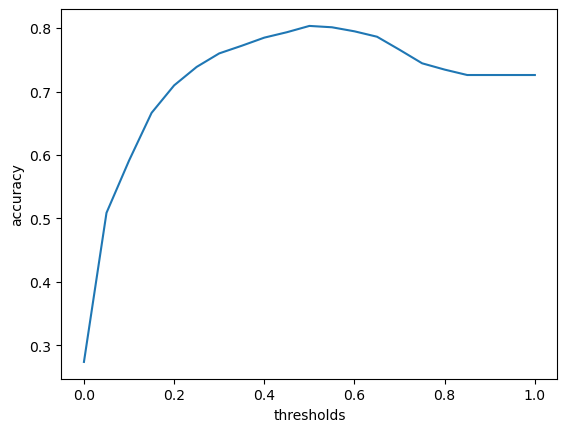

In [26]:
plt.plot(thresholds, scores)
plt.xlabel('thresholds')
plt.ylabel('accuracy')

In scikit-learn there ia already a function for calculating accuracy.

In [27]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_val, churn_decision)

0.7260468417317246

In [31]:
scores = []
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f  %.3f' %(t, score))
    scores.append(score)

0.00  0.274
0.05  0.509
0.10  0.591
0.15  0.666
0.20  0.710
0.25  0.739
0.30  0.760
0.35  0.772
0.40  0.785
0.45  0.793
0.50  0.803
0.55  0.801
0.60  0.795
0.65  0.786
0.70  0.766
0.75  0.744
0.80  0.735
0.85  0.726
0.90  0.726
0.95  0.726
1.00  0.726


In [32]:
y_pred >= 1.0

array([False, False, False, ..., False, False, False])

In [33]:
from collections import Counter

In [34]:
Counter(y_pred >= 1.0)

Counter({False: 1409})

Thus, we see that if we put threshold at 1, i.e. we treat a customer as churning if score is above 1, i.e. we say everyone is nonchurning, still we are 73% right. Thus we gained only 7% accuracy with our model. We were 73% right by treating everyone as nonchurning. Then why should bother about our model, if dummy model already gives us 73% accuracy.

In [36]:
Counter(y_val)

Counter({0: 1023, 1: 386})

In [39]:
y_val.mean()

0.2739531582682754

In [38]:
1 - y_val.mean()

0.7260468417317246

We see that 27% of users are non-churning.

Thus if we predict everyone as non-churning, then we are right 72% of the times. And if we predict everypne as churning, then we are right 27% of the times.

There is a **CLASS IMBALANCE**. We have lot more customers who are non-churning, here we have 3:1. Thus accuracy is a score, that can be quite misleading when we have **class imbalance**. There are other ways of evaluating binary classification models, that are quite useful.

Next lesson, we'll talk about confusion tables and different types of errors models can make.

end of video: [ML Zoomcamp 4.2 - Accuracy and Dummy Model](https://www.youtube.com/watch?v=FW_l7lB0HUI&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=41&t=3s)

start of video: [ML Zoomcamp 4.3 - Confusion Table](https://www.youtube.com/watch?v=Jt2dDLSlBng&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=42)

## 4.3 Confusion table

* Different types of errors and correct decisions
*  Arranging them in a table

Confusion table is a way of looking at different errors and correct decisions that our binary classification model makes. In the previouse session, we looked at accuracy. We looked at accuracy across different thresholds for making decisions. We noticed that if we have a dummy model, it is quite good compared to the model we have and the reason for that is we have **Class imbalance** in our dataset. If we predict that everyone is non-churning our model is quite good. We need to have a different way to evaluate the quality of our model, so that it is not affected by **Class imbalance**. For that, we'll start with **Confusion table**.